In [1]:
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.base import clone
from sklearn.model_selection import KFold
import numpy as np

In [2]:
def show_conf_matrix(predicted, y):
    confusion_matr = confusion_matrix(y, predicted)
    confusion_matrix_display = ConfusionMatrixDisplay(confusion_matr)
    fig, ax = plt.subplots(figsize=(10, 10))
    confusion_matrix_display.plot(ax=ax)


def cross_val(classifier, X, y, k, shuffle=False):
    kf = KFold(n_splits=k, shuffle=shuffle)
    trained_classifier = []
    accuracy_list = []
    for train_index, test_index in kf.split(X):
        X_train_kfold, X_test_kfold = X[train_index], X[test_index]
        y_train_kfold, y_test_kfold = y[train_index], y[test_index]
        classifier_fold = clone(classifier)
        classifier_fold.fit(X_train_kfold, y_train_kfold)
        prediction = classifier_fold.predict(X_test_kfold)
        accuracy = accuracy_score(y_test_kfold, prediction)
        trained_classifier.append(classifier_fold)
        accuracy_list.append(accuracy)
    return trained_classifier, accuracy_list


def check_classifier(classifier, X_train, y_train, X_val, y_val):
    trained_classifier, accuracy_list = cross_val(classifier, X_train, y_train, 5)
    accuracy = 0.0
    for i in range(len(accuracy_list)):
        accuracy += accuracy_score(y_val, trained_classifier[i].predict(X_val))
    print(accuracy_list)
    accur = accuracy / len(accuracy_list)
    print("Accuracy %.4f" % accur)
    returned_classifier = trained_classifier[np.argmax(accuracy_list)]
    return returned_classifier


def show_result(clf, X_train, y_train, X_val, y_val):
    best_classifier = check_classifier(clf, X_train, y_train, X_val, y_val)
    prediction = best_classifier.predict(X_val)
    show_conf_matrix(y_val, prediction)

# Loading data

In [3]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
train_samples = 10000
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=train_samples, test_size=2000)

# KNN

[0.927, 0.9365, 0.947, 0.9315, 0.9335]
Accuracy 0.9305


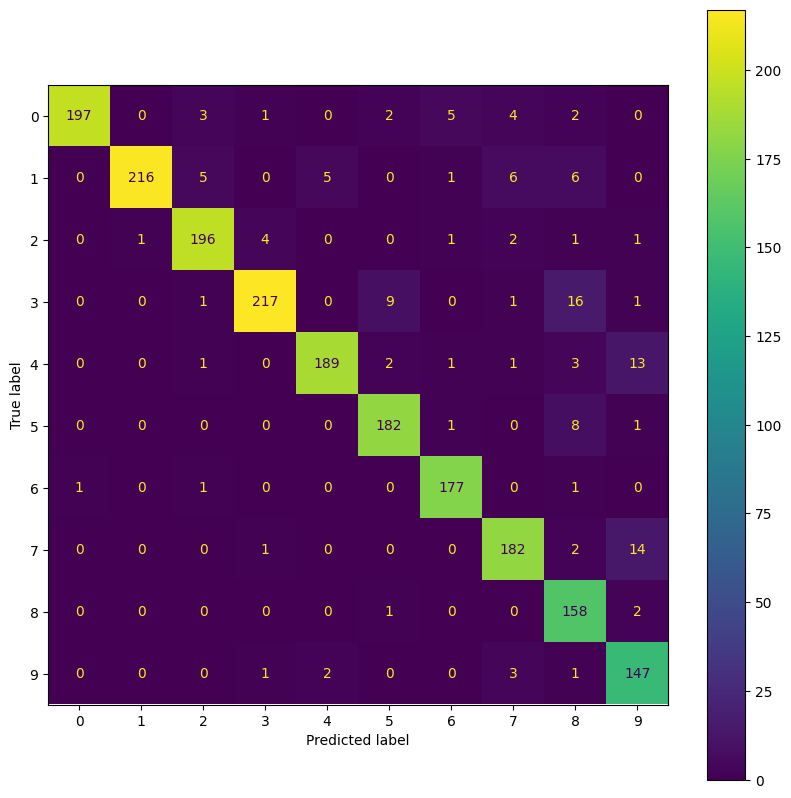

In [4]:
KNN_classifiers = []
for i in range(5):
    KNN_classifiers.append(KNeighborsClassifier(i + 2))
show_result(KNN_classifiers[0], train_x, train_y, test_x, test_y)

[0.939, 0.9485, 0.9595, 0.943, 0.943]
Accuracy 0.9476


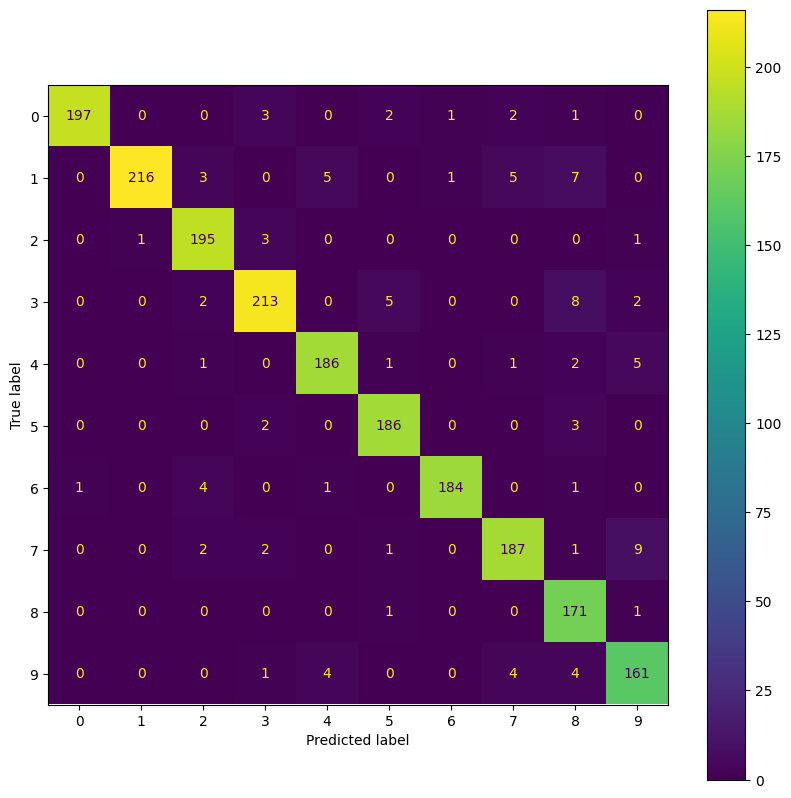

In [5]:
show_result(KNN_classifiers[1], train_x, train_y, test_x, test_y)

[0.938, 0.946, 0.9545, 0.9395, 0.9385]
Accuracy 0.9439


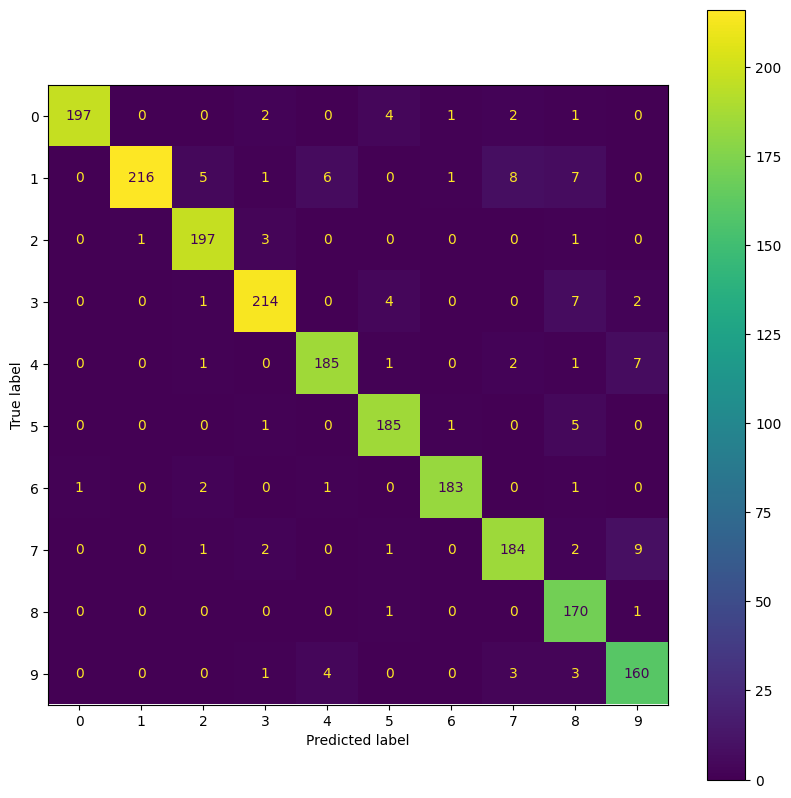

In [6]:
show_result(KNN_classifiers[2], train_x, train_y, test_x, test_y)

[0.9335, 0.948, 0.9555, 0.94, 0.939]
Accuracy 0.9455


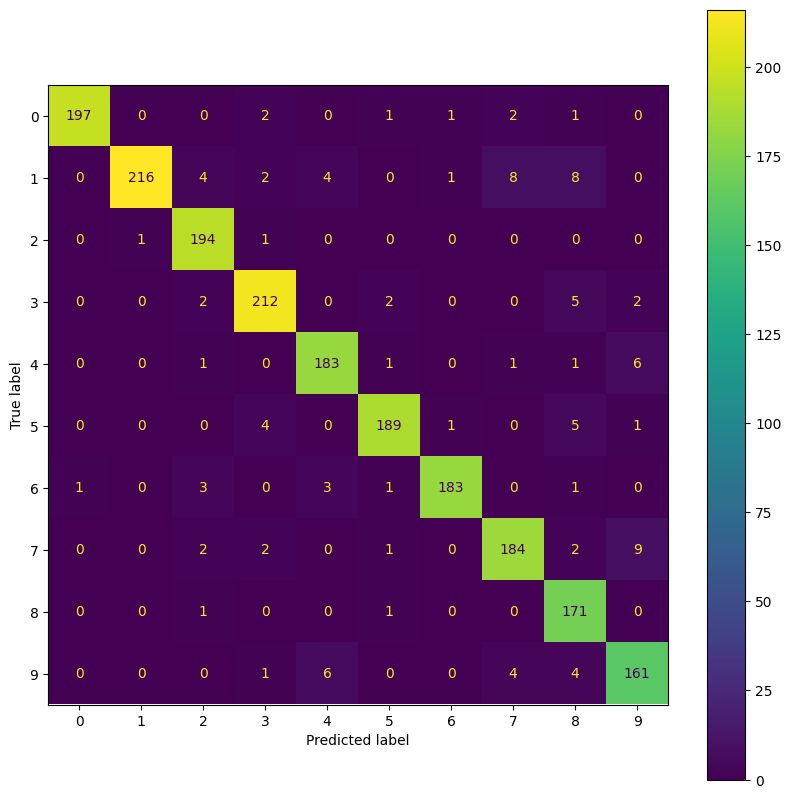

In [7]:
show_result(KNN_classifiers[3], train_x, train_y, test_x, test_y)

[0.932, 0.9465, 0.9525, 0.935, 0.935]
Accuracy 0.9423


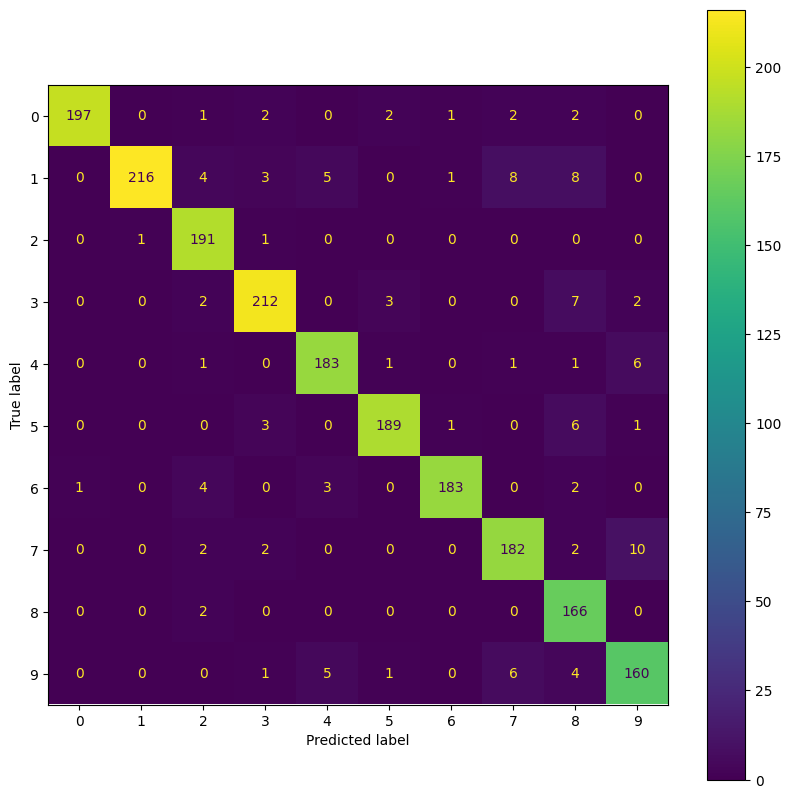

In [8]:
show_result(KNN_classifiers[4], train_x, train_y, test_x, test_y)

# Decision Tree

In [9]:
DTC = []
for i in range(10):
    DTC.append(DecisionTreeClassifier(max_depth=i + 1))

[0.211, 0.203, 0.2045, 0.1915, 0.191]
Accuracy 0.1863


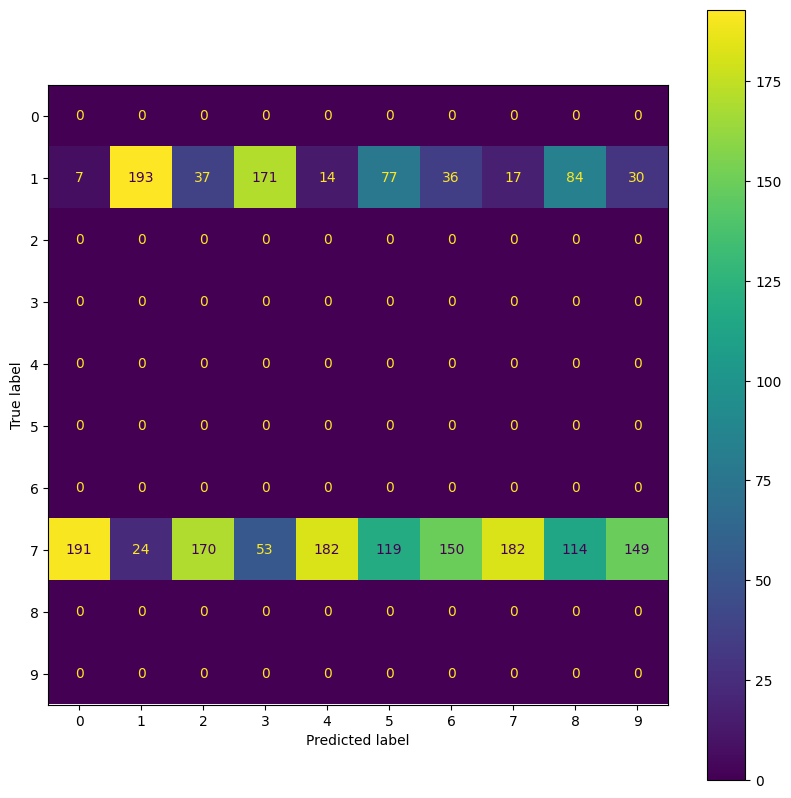

In [10]:
show_result(DTC[0], train_x, train_y, test_x, test_y)

[0.354, 0.325, 0.3465, 0.3265, 0.3265]
Accuracy 0.3390


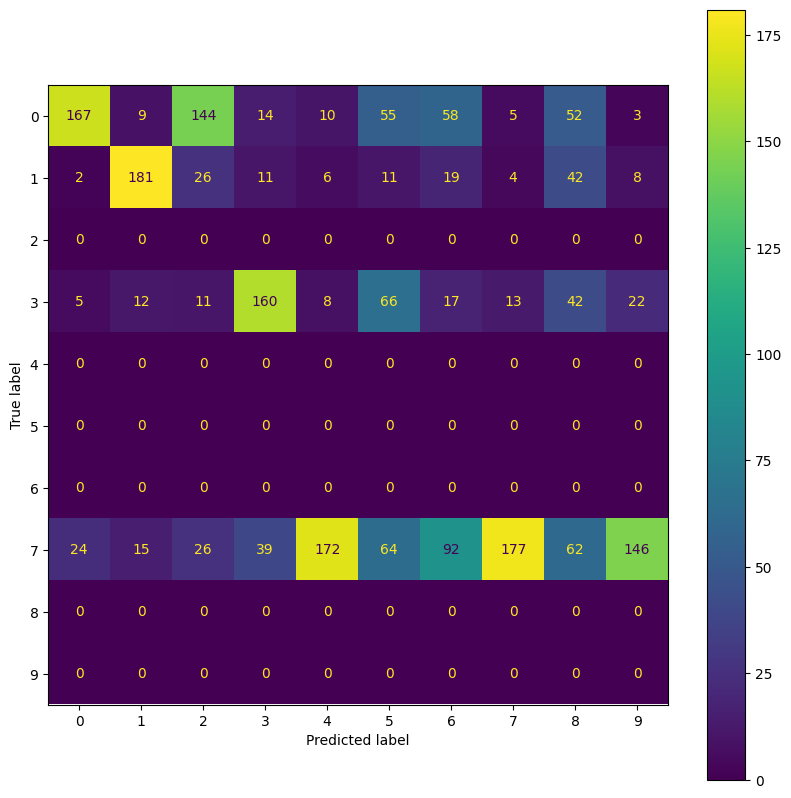

In [11]:
show_result(DTC[1], train_x, train_y, test_x, test_y)

[0.4915, 0.478, 0.482, 0.4795, 0.4675]
Accuracy 0.4846


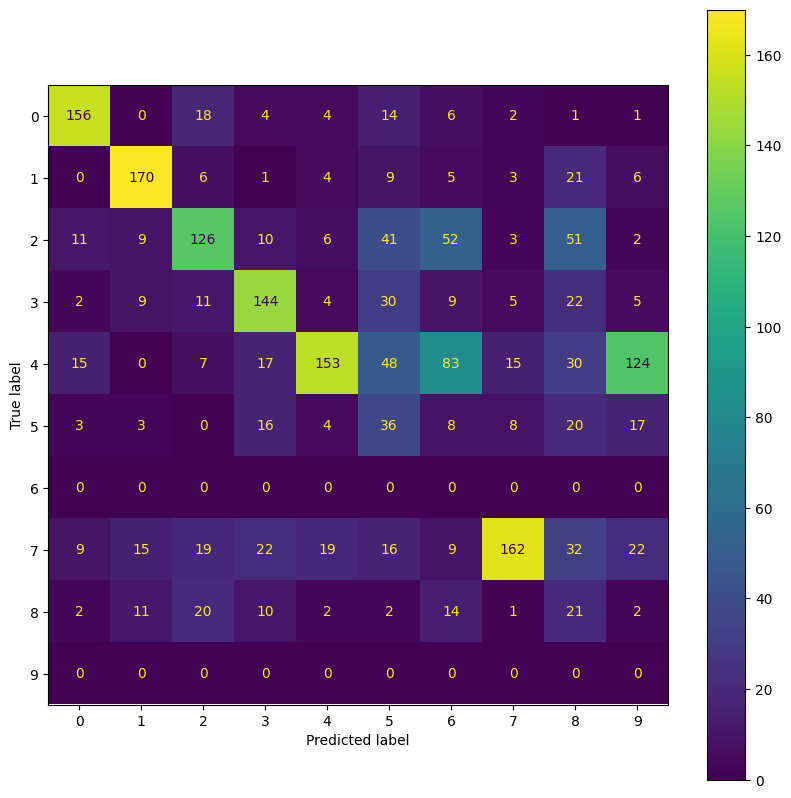

In [12]:
show_result(DTC[2], train_x, train_y, test_x, test_y)

[0.582, 0.5815, 0.5855, 0.5895, 0.5765]
Accuracy 0.5915


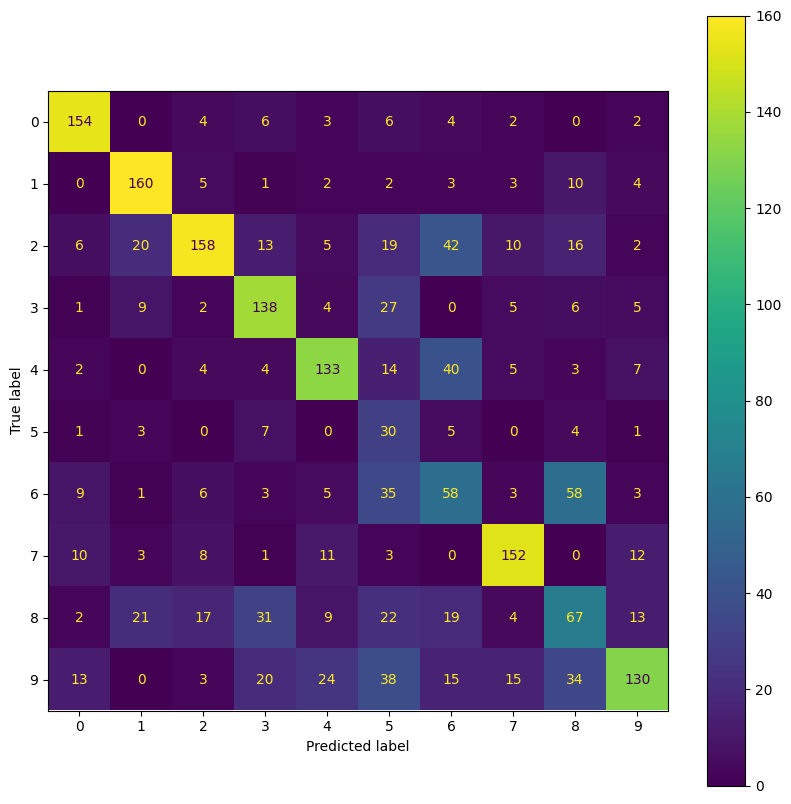

In [13]:
show_result(DTC[3], train_x, train_y, test_x, test_y)

[0.667, 0.6605, 0.6685, 0.668, 0.653]
Accuracy 0.6668


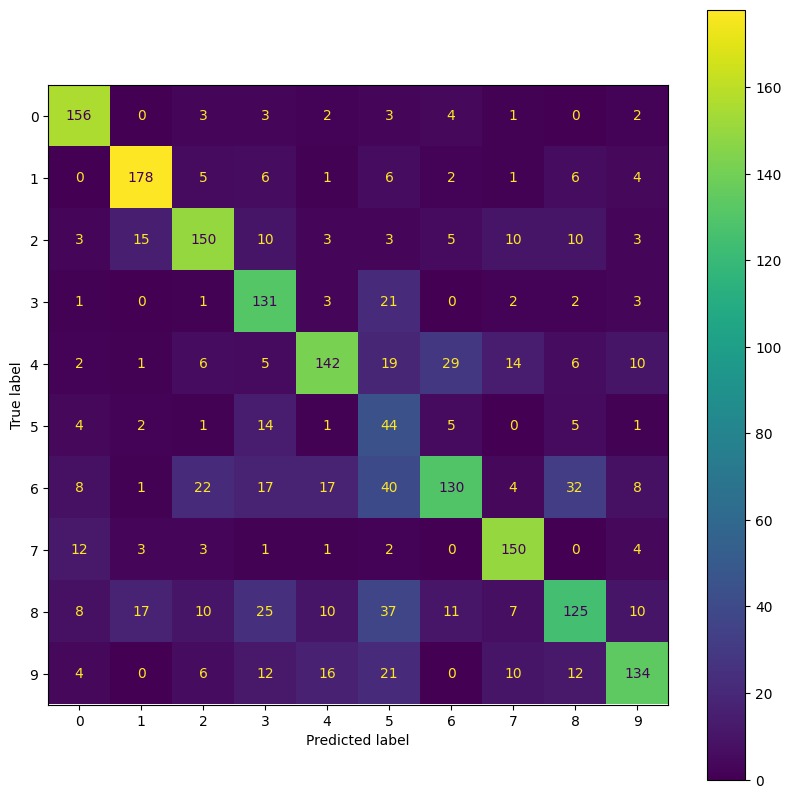

In [14]:
show_result(DTC[4], train_x, train_y, test_x, test_y)

[0.7285, 0.7375, 0.727, 0.7195, 0.7145]
Accuracy 0.7236


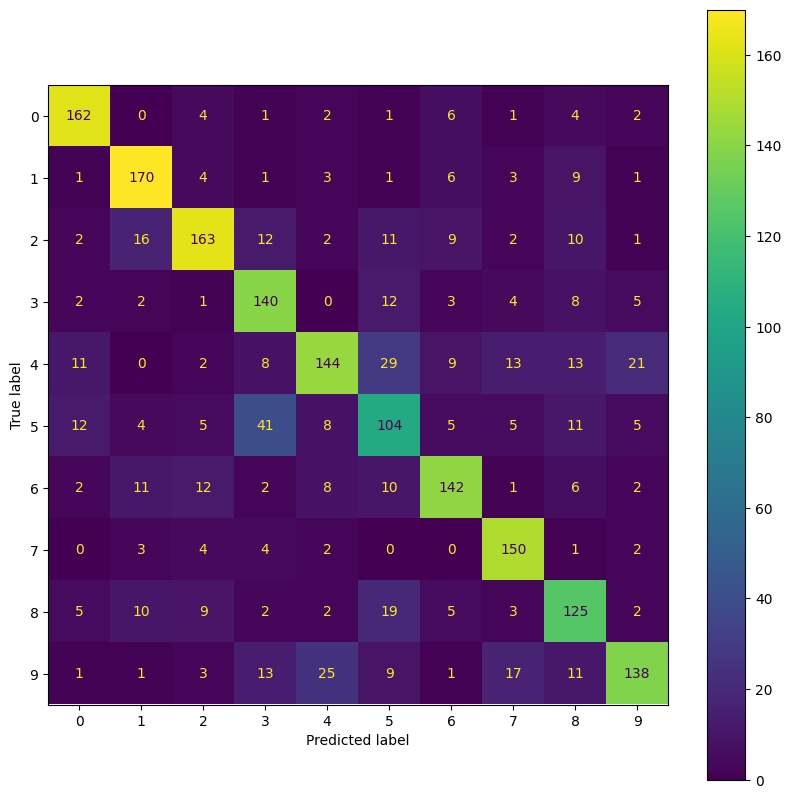

In [15]:
show_result(DTC[5], train_x, train_y, test_x, test_y)

[0.7585, 0.763, 0.7465, 0.747, 0.751]
Accuracy 0.7562


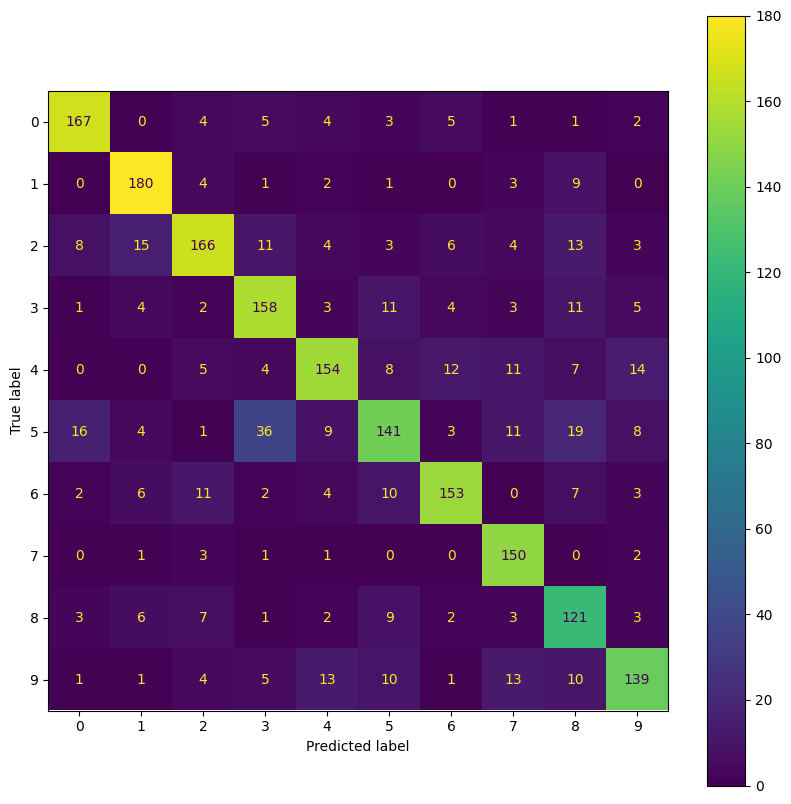

In [16]:
show_result(DTC[6], train_x, train_y, test_x, test_y)

[0.7785, 0.789, 0.779, 0.7835, 0.773]
Accuracy 0.7807


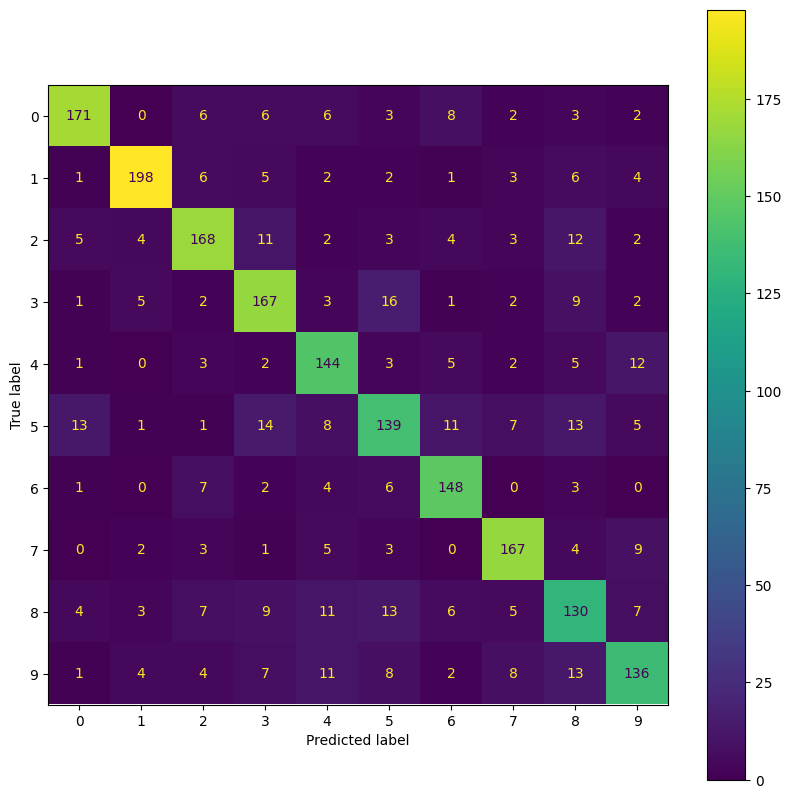

In [17]:
show_result(DTC[7], train_x, train_y, test_x, test_y)

[0.782, 0.7955, 0.784, 0.7955, 0.791]
Accuracy 0.8020


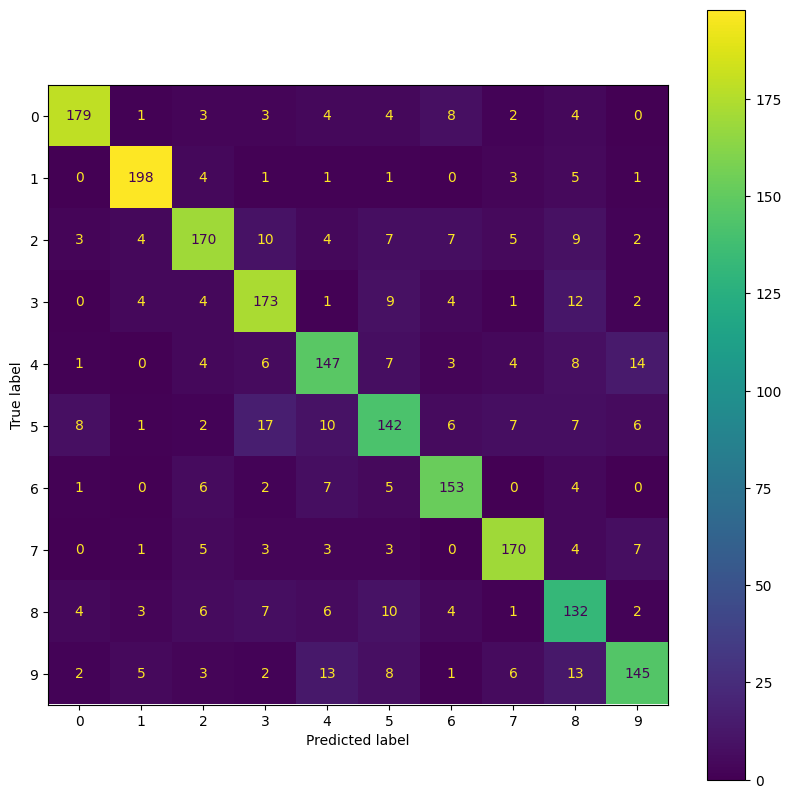

In [18]:
show_result(DTC[8], train_x, train_y, test_x, test_y)

[0.7865, 0.806, 0.787, 0.8045, 0.7875]
Accuracy 0.8007


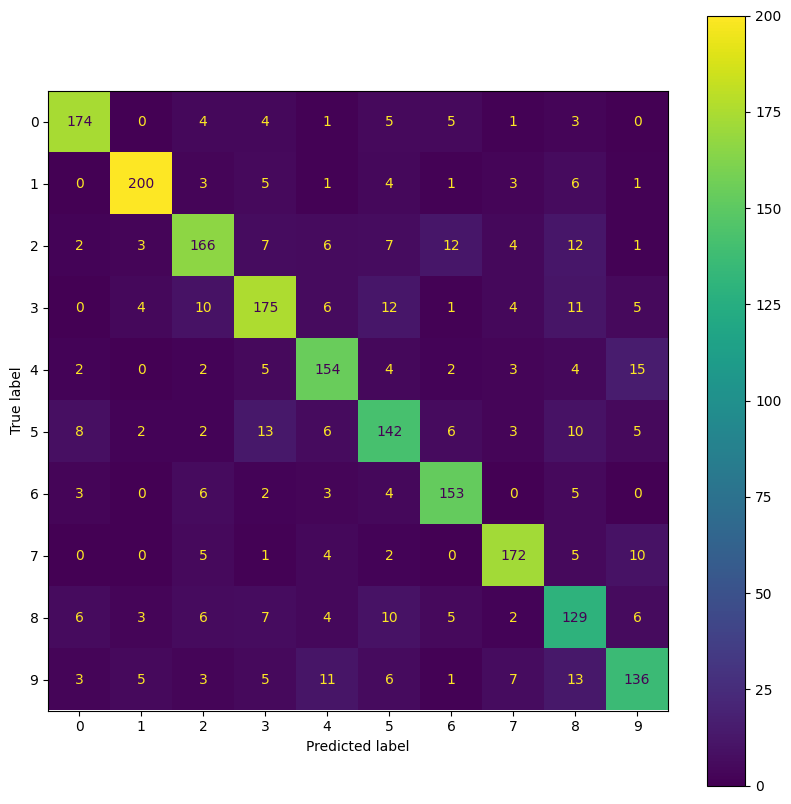

In [19]:
show_result(DTC[9], train_x, train_y, test_x, test_y)

# Log regression

[0.898, 0.912, 0.91, 0.9075, 0.8905]
Accuracy 0.9051


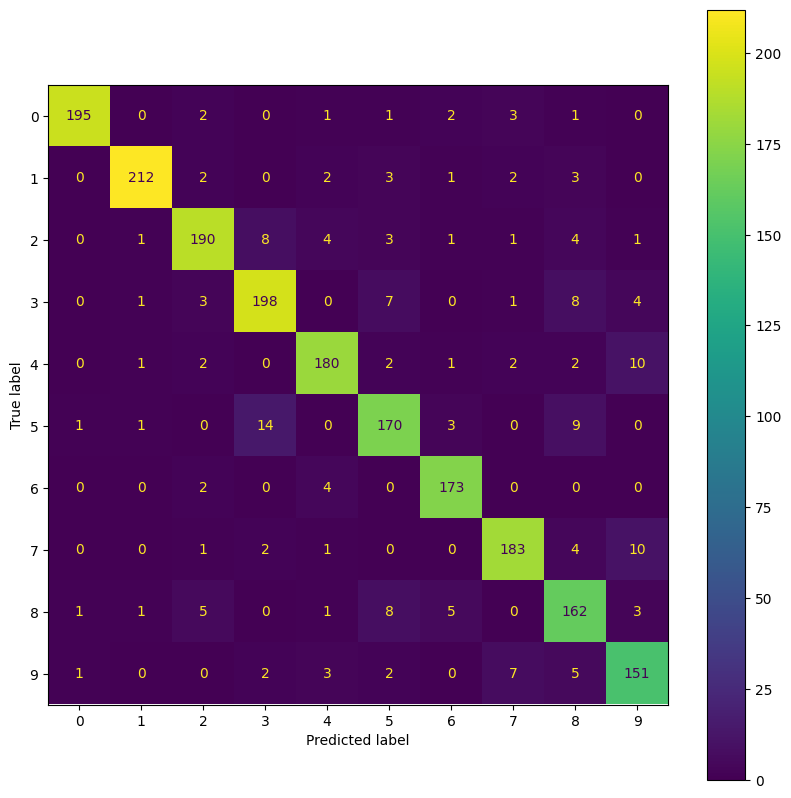

In [20]:
show_result(LogisticRegression(C=10, penalty="l1", solver="saga", tol=0.1), train_x, train_y, test_x,
            test_y)
#нарисовать пиксели у которых в л1 рег занулились веса

#как строятся деревья в РФ и бустинги


[0.8985, 0.911, 0.91, 0.906, 0.891]
Accuracy 0.9057


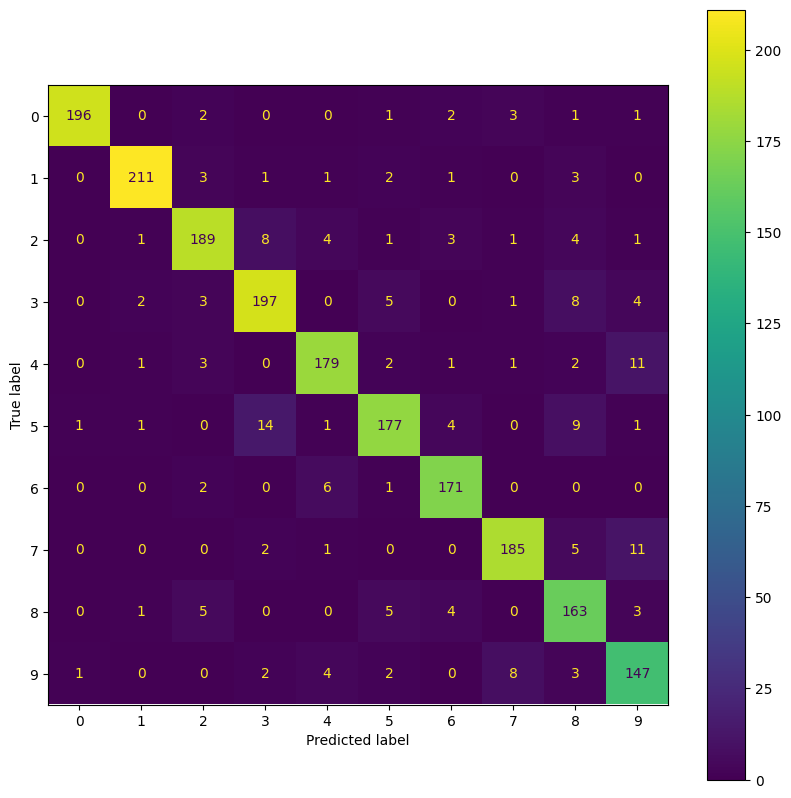

In [21]:
show_result(LogisticRegression(C=0.1, penalty="l1", solver="saga", tol=0.1), train_x, train_y, test_x,
            test_y)

# SVM

In [22]:
SVC_classifiers = []
SVC_kernels = {'linear', 'poly', 'rbf', 'sigmoid'}
for sv_kernel in SVC_kernels:
    SVC_classifiers.append(SVC(kernel=sv_kernel))

[0.945, 0.9585, 0.956, 0.949, 0.9495]
Accuracy 0.9450


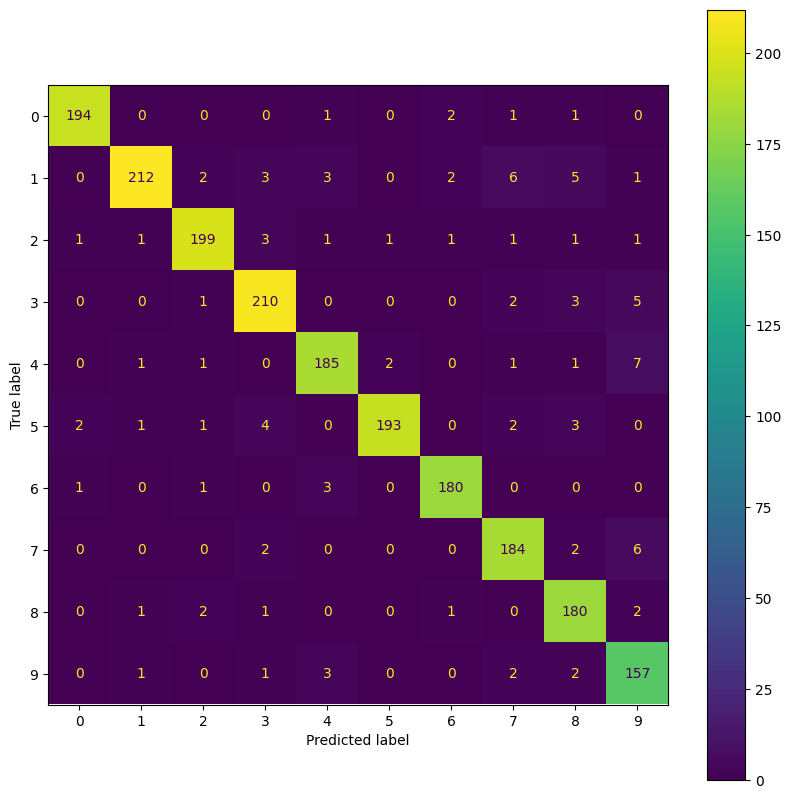

In [23]:
show_result(SVC_classifiers[0], train_x, train_y, test_x, test_y)

[0.9025, 0.919, 0.9175, 0.911, 0.9005]
Accuracy 0.9126


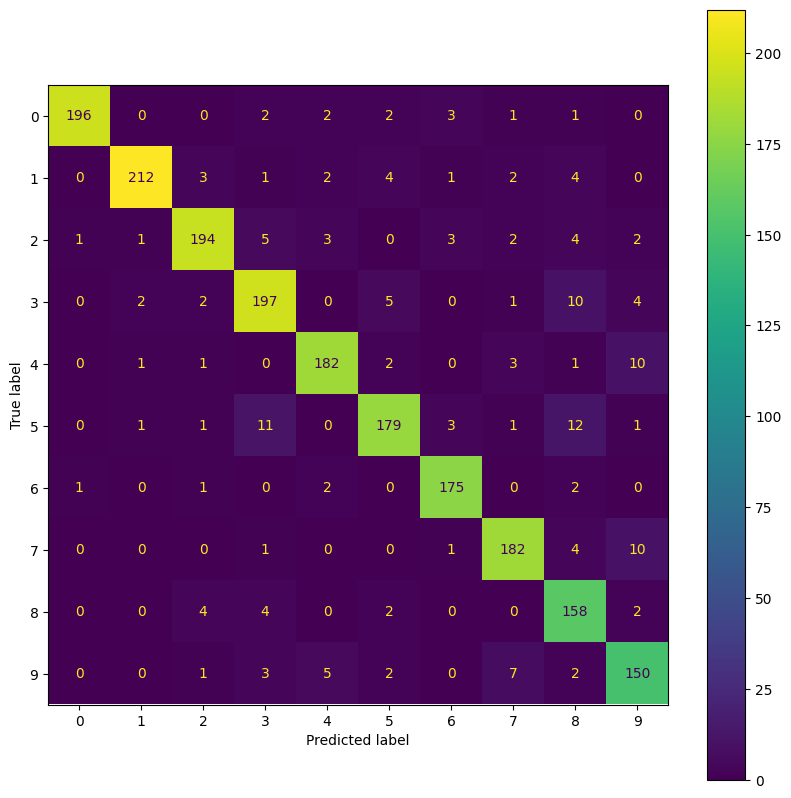

In [24]:
show_result(SVC_classifiers[1], train_x, train_y, test_x, test_y)

[0.9555, 0.964, 0.959, 0.9595, 0.958]
Accuracy 0.9589


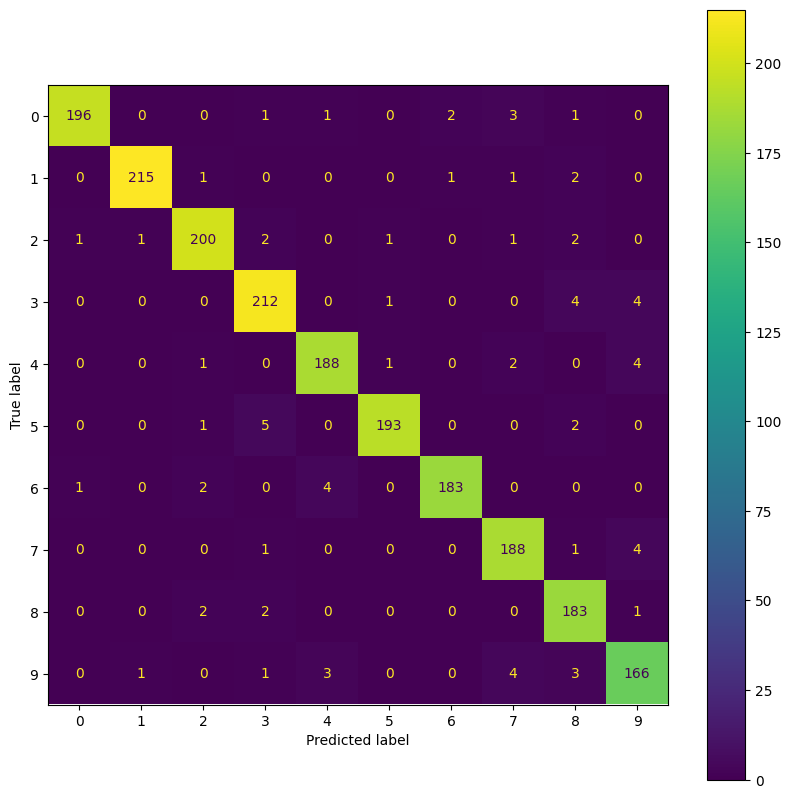

In [25]:
show_result(SVC_classifiers[2], train_x, train_y, test_x, test_y)

[0.8195, 0.8175, 0.833, 0.823, 0.809]
Accuracy 0.8229


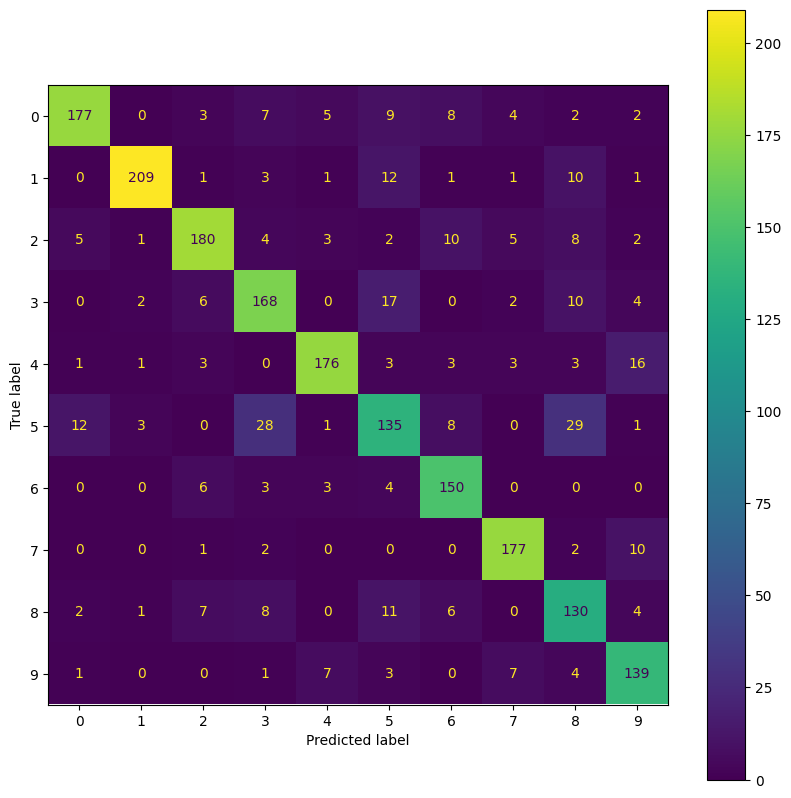

In [26]:
show_result(SVC_classifiers[3], train_x, train_y, test_x, test_y)

# xgboost

[0.9435, 0.953, 0.9565, 0.957, 0.9445]
Accuracy 0.9528


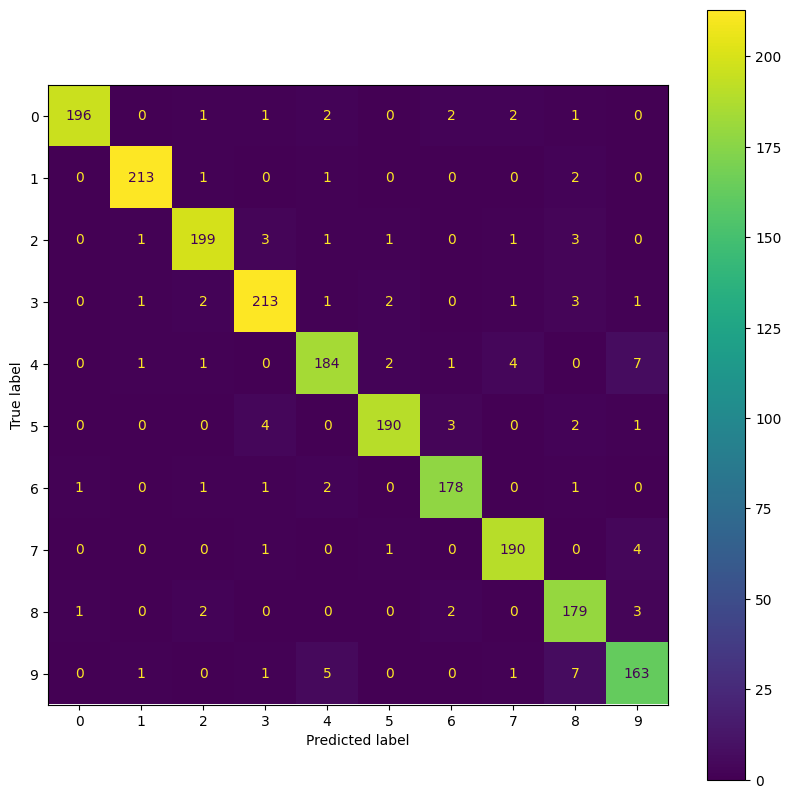

In [27]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier()
train_y = train_y.astype(np.uint8)
test_y = test_y.astype(np.uint8)
show_result(xgb_classifier, train_x, train_y, test_x, test_y)

# Random Forest

[0.9465, 0.9525, 0.9535, 0.9545, 0.94]
Accuracy 0.9467


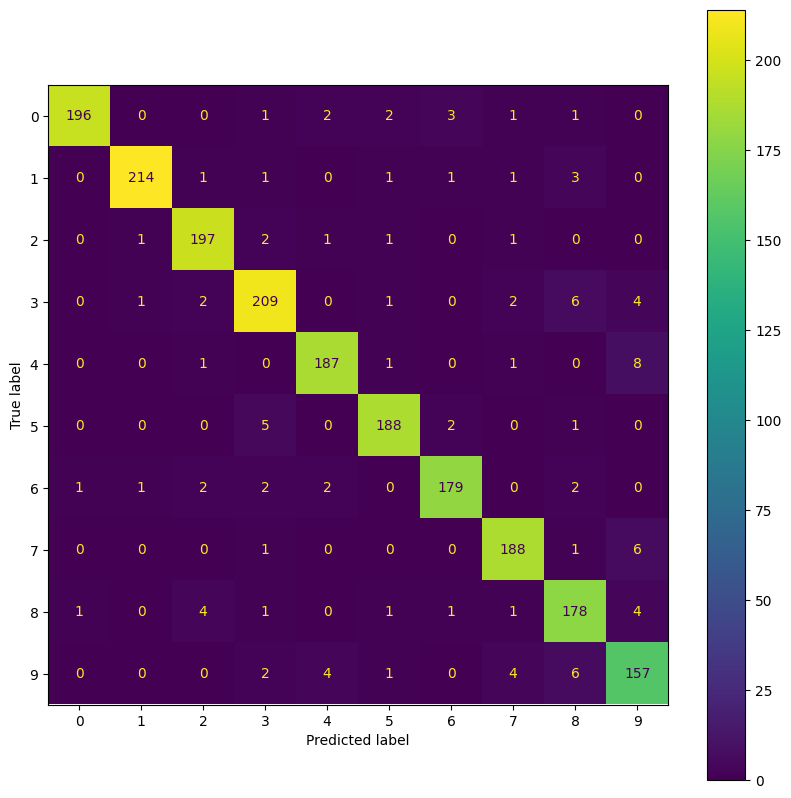

In [28]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
show_result(rfc,train_x, train_y, test_x, test_y)